# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

enter the zip file to open(images.zip or small_img.zip) :small_img.zip
enter the character(Christopher or Mark):Christopher
Results found in file a-0.png


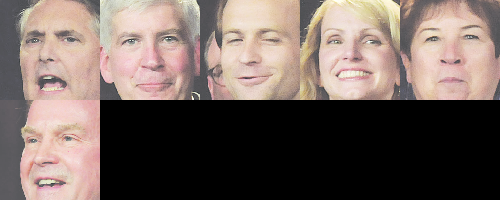

Results found in file a-3.png


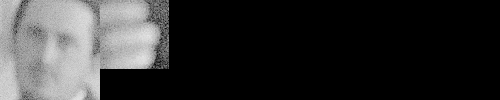

In [ ]:
import zipfile
from zipfile import *
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
file_h = str(input('enter the zip file to open(images.zip or small_img.zip) :'))
zip_file = zipfile.ZipFile('readonly/{}'.format(file_h),'r') #reading the zip file

images = []       #creating an empty list
if file_h == 'images.zip' :
    l = [0,1,10,11,12,13,2,3,4,5,6,7,8,9]
elif file_h == 'small_img.zip' :
    l = [0,1,2,3]

user_inp = str(input('enter the character(Christopher or Mark):'))

for file in ZipFile.infolist(zip_file):     #itering through the list of contents of zip folder
    k = zip_file.open(file)
    kl = Image.open(k)
    images.append(kl)          # appending contents to the list
images1 = []                   # create an empty dictionary

           #changing image to an numpy array
for i in images :
    img1 = []
    img = np.asarray(i)
    faces = face_cascade.detectMultiScale(img, scaleFactor =1.3, minNeighbors = 5)  #detecting the faces using certain params
    img_l = faces[:] 
    #print(img_l)
    for face in img_l:
        
        imga = i.crop((face[0],face[1],face[0]+face[2],face[1]+face[3])) # cropping an image using cooordinates from opencv

        if imga.width > 100 or imga.height > 100 :
            img1.append(imga.resize((100,100)))# creating thumbnail images and appending them to list
        else :
            img1.append(imga)

    images1.append(img1)  # adding list to dictionary  


iterab = 0
for image in images:
    
    image = image.convert('L')     # converting image into grayscale
    text = pytesseract.image_to_string(image)       # converting image to an text
    
    
    if user_inp in text :  # checking if the user input string is in the text obtained
         
        x=0
        y=0
        if len(images1[iterab]) > 5 :
            contact_sheet = Image.new('RGB', (500,200))
        else:
            contact_sheet = Image.new('RGB', (500,100))
        if images1[iterab] != []:
            for val in images1[iterab] :


                contact_sheet.paste(val, (x, y) )

                if x+100 == contact_sheet.width:
                    x=0
                    y=y+100
                else:
                    x=x+100
            print('Results found in file a-{}.png'.format(l[iterab]))
            display(contact_sheet)
        else:
            print('Results found in file a-{}.png'.format(l[iterab]))
            print('But there were no faces in that file!')
        
    iterab += 1
        
      
